In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Iris/Iris.csv")

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.shape

(150, 6)

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
df = df.drop("Id", axis=1)

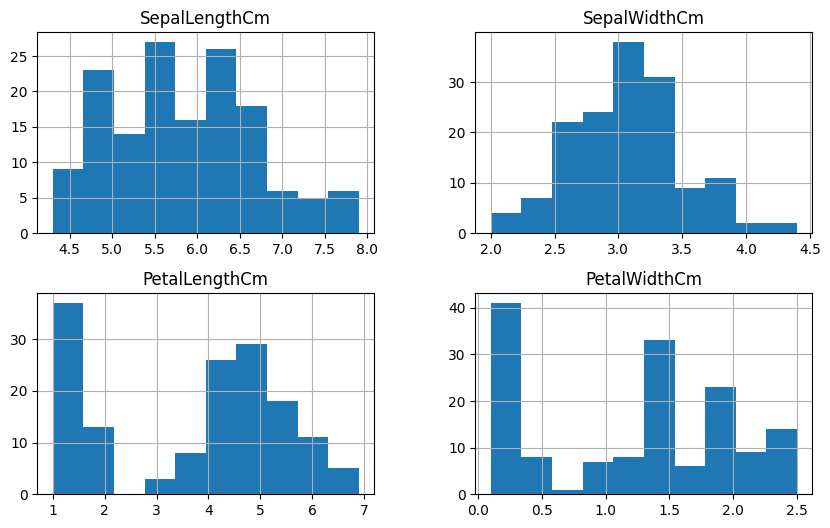

In [ ]:
df.hist(figsize=(10,6))
plt.show()

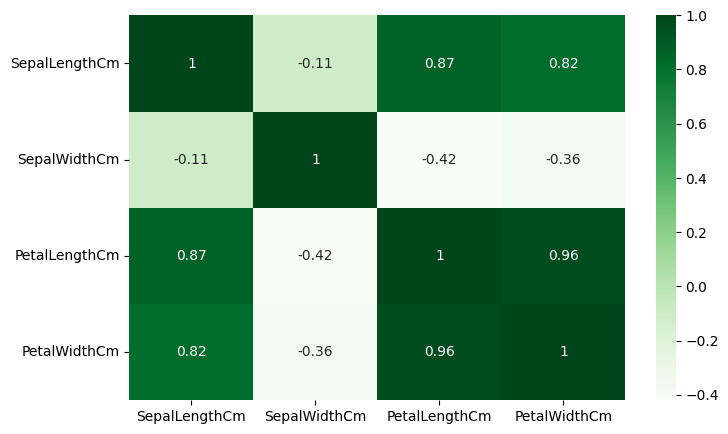

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Greens')
plt.show()

In [ ]:
X = df.drop("Species", axis=1)
y = df['Species']

In [ ]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,     # 20% test data
    random_state=2,   # ensures repeatability
    stratify=y      # ensures balanced classes in train & test
)

In [ ]:
X_train.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
63,6.1,2.9,4.7,1.4


In [ ]:
X_test.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
45,4.8,3.0,1.4,0.3


In [ ]:
y_train.head(1)

,Species
63,Iris-versicolor


In [ ]:
y_test.head(1)

,Species
45,Iris-setosa


In [ ]:
log_reg_model = LogisticRegression(max_iter=15)

In [ ]:
log_reg_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=15)

In [ ]:
y_pred = log_reg_model.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9666666666666667

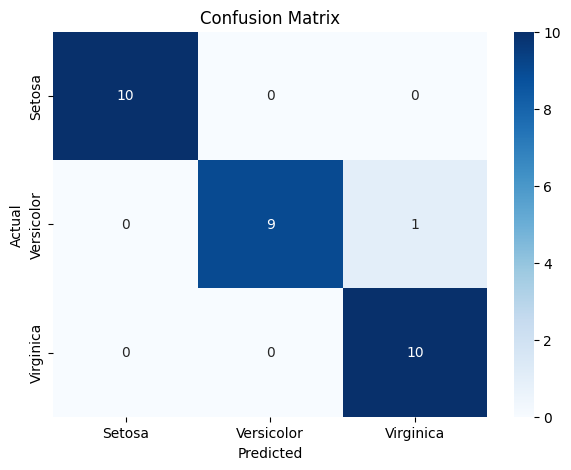

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt="d",
            xticklabels=['Setosa','Versicolor','Virginica'],
            yticklabels=['Setosa','Versicolor','Virginica'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
new_flowers_10 = pd.DataFrame({
    "SepalLengthCm": [4.9, 5.7, 6.3, 7.1, 5.4, 6.9, 5.0, 6.1, 4.8, 7.3],
    "SepalWidthCm":  [3.6, 2.8, 3.3, 3.0, 3.9, 3.1, 3.4, 2.8, 3.0, 2.9],
    "PetalLengthCm": [1.4, 4.1, 5.6, 5.9, 1.7, 4.9, 1.5, 4.7, 1.4, 6.3],
    "PetalWidthCm":  [0.2, 1.3, 2.4, 2.1, 0.4, 1.5, 0.2, 1.3, 0.2, 2.5]
})

In [ ]:
new_flowers_10

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.9,3.6,1.4,0.2
1,5.7,2.8,4.1,1.3
2,6.3,3.3,5.6,2.4
3,7.1,3.0,5.9,2.1
4,5.4,3.9,1.7,0.4
5,6.9,3.1,4.9,1.5
6,5.0,3.4,1.5,0.2
7,6.1,2.8,4.7,1.3
8,4.8,3.0,1.4,0.2
9,7.3,2.9,6.3,2.5


In [ ]:
new_flowers_10["Predicted_Species"] = log_reg_model.predict(new_flowers_10)

new_flowers_10

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted_Species
0,4.9,3.6,1.4,0.2,Iris-setosa
1,5.7,2.8,4.1,1.3,Iris-versicolor
2,6.3,3.3,5.6,2.4,Iris-virginica
3,7.1,3.0,5.9,2.1,Iris-virginica
4,5.4,3.9,1.7,0.4,Iris-setosa
5,6.9,3.1,4.9,1.5,Iris-versicolor
6,5.0,3.4,1.5,0.2,Iris-setosa
7,6.1,2.8,4.7,1.3,Iris-versicolor
8,4.8,3.0,1.4,0.2,Iris-setosa
9,7.3,2.9,6.3,2.5,Iris-virginica


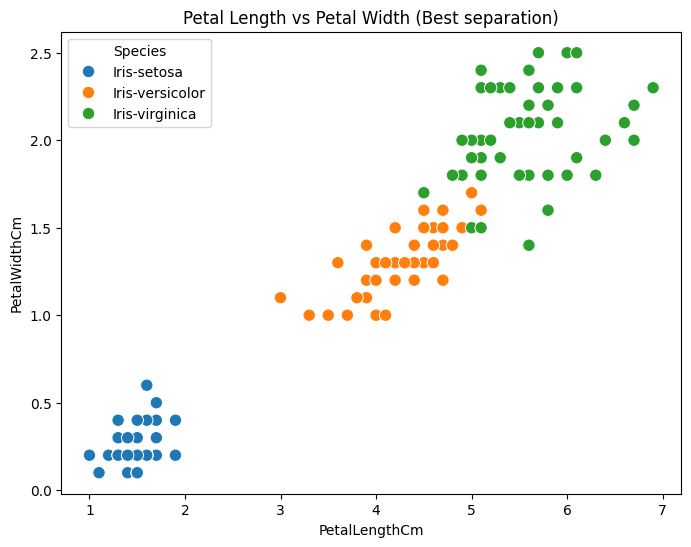

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="PetalLengthCm",
    y="PetalWidthCm",
    hue="Species",
    s=80
)
plt.title("Petal Length vs Petal Width (Best separation)")
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.9666666666666667

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

In [ ]:
print(classification_report(y_test, y_pred_knn))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
dt_model = DecisionTreeClassifier(
    criterion='gini',   # or 'entropy'
    max_depth=3,        # limit depth to avoid overfitting
    random_state=42
)

In [ ]:
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [ ]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.9333333333333333

In [ ]:
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.9333333333333333

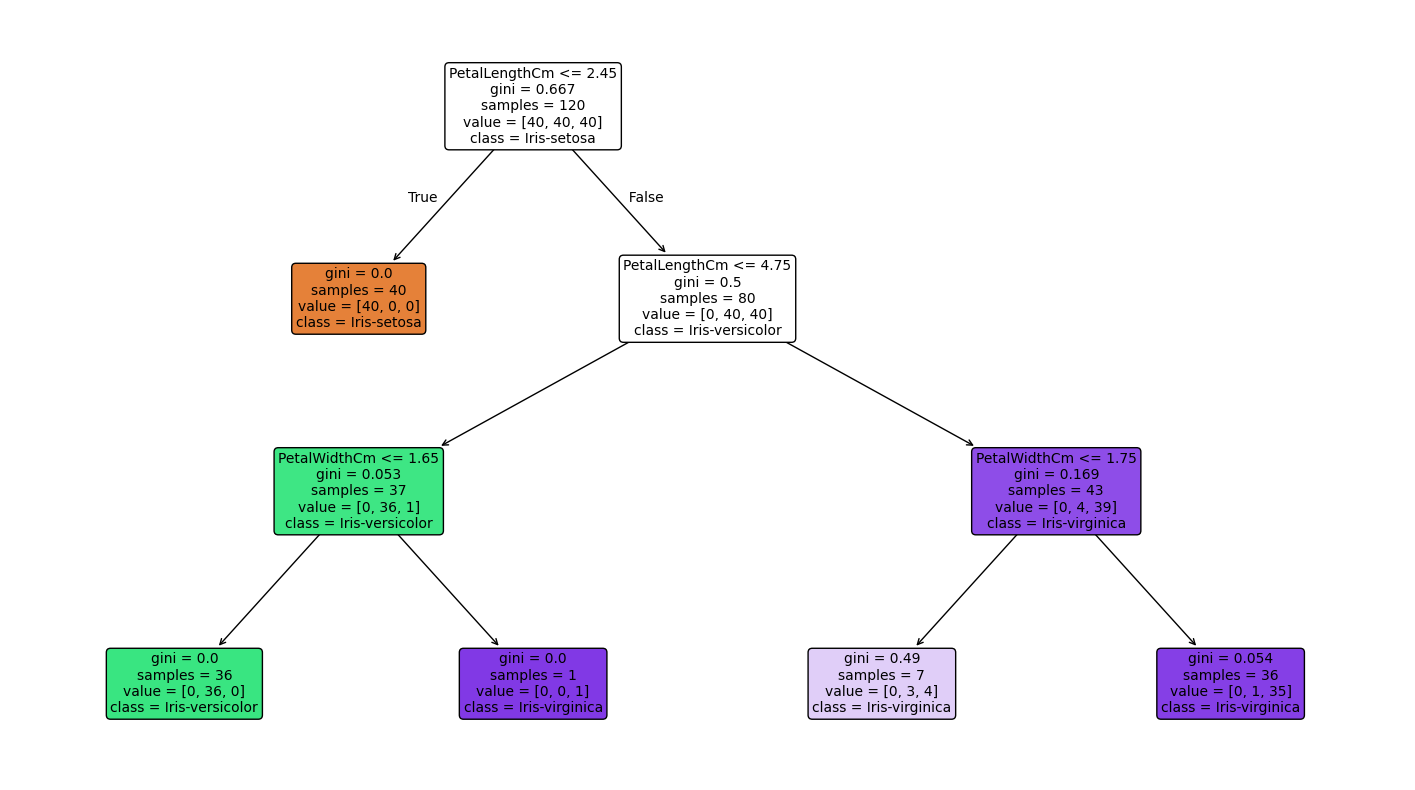

In [ ]:
plt.figure(figsize=(18,10))
plot_tree(
    dt_model,
    feature_names=X_train.columns,
    class_names=dt_model.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()